Paquetes necesarios:

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

Cargar imagen del drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Monedas: 6


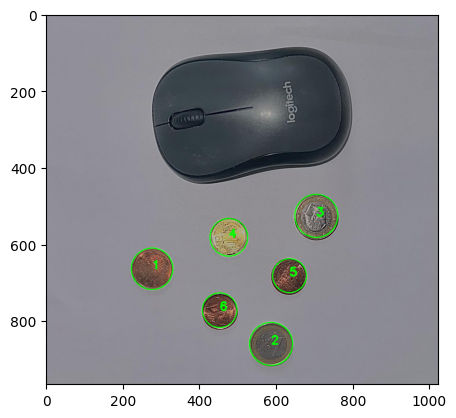

In [3]:
#Cargar la imagen
img = cv2.imread('/content/drive/My Drive/Monedas.jpeg')
img_solapada = cv2.imread('/content/drive/My Drive/Monedas_solapadas.jpeg')

#Calculamos la cantidad de monedas
img_cont = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
circles = cv2.HoughCircles(img_cont,cv2.HOUGH_GRADIENT,1,40,
 param1=300,param2=75,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
img_cont = cv2.imread('/content/drive/My Drive/Monedas.jpeg')
img_cont = cv2.cvtColor(img_cont, cv2.COLOR_BGR2RGB)

count=0
for index,i in enumerate(circles[0,:]):
   # draw the outer circle
  cv2.circle(img_cont,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.putText(img_cont, str(index +1), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
  count+=1
plt.imshow(img_cont)
print("Monedas:",count)


TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?

In [5]:
from os import truncate
#Valor de las monedas
coin_diameter = {
    0.10: 39.5,
    0.50: 48.5,
    1: 46.5,
    0.01: 32.52,
    0.02: 36.34,
    0.05: 42.5
}

ref = int(input("Seleccione moneda de referencia: ")) -1
print("Radio de referencia:",circles[0][ref][2])
print("Radio real:",coin_diameter[1])

#Calculamos el diametro escalado
constante_proporcional = circles[0][ref][2] / coin_diameter[1]

#Diccionario adaptado a la imagen
diccionario_img = {clave: valor * constante_proporcional for clave, valor in coin_diameter.items()}
radios = [*diccionario_img.values()]


#Sumamos valor
dinero = 0
for circulo in circles[0,:]:

  valor = circulo[2]

  valor_mas_cercano = radios[0]
  distancia_mas_cercana = abs(valor - radios[0])  # Inicializa con la distancia al primer valor

  for valor_radio in radios:
      distancia = abs(valor - valor_radio)
      if distancia < distancia_mas_cercana:
          distancia_mas_cercana = distancia
          valor_mas_cercano = valor_radio

  dinero += list(diccionario_img.keys())[list(diccionario_img.values()).index(valor_mas_cercano)]

print("Dinero total: ",round(dinero, 2), "€")


Seleccione moneda de referencia: 2
Radio de referencia: 64
Radio real: 46.5
Dinero total:  2.79 €


Monedas: 9


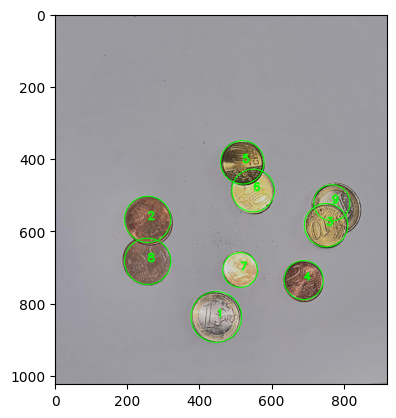

In [6]:

#Calculamos la cantidad de monedas
img_cont = cv2.cvtColor(img_solapada, cv2.COLOR_RGB2GRAY)
circles = cv2.HoughCircles(img_cont,cv2.HOUGH_GRADIENT,1,60,
 param1=280,param2=100,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
img_cont = cv2.imread('/content/drive/My Drive/Monedas_solapadas.jpeg')
img_cont = cv2.cvtColor(img_cont, cv2.COLOR_BGR2RGB)

count=0
for index,i in enumerate(circles[0,:]):
   # draw the outer circle
  cv2.circle(img_cont,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.putText(img_cont, str(index +1), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
  count+=1
plt.imshow(img_cont)
print("Monedas:",count)

In [7]:
ref = int(input("Seleccione moneda de referencia: ")) -1
print("Radio de referencia:",circles[0][ref][2])
print("Radio real:",coin_diameter[1])

#Calculamos el diametro escalado
constante_proporcional = circles[0][ref][2] / coin_diameter[1]

#Diccionario adaptado a la imagen
diccionario_img = {clave: valor * constante_proporcional for clave, valor in coin_diameter.items()}
radios = [*diccionario_img.values()]


#Sumamos valor
dinero = 0
for circulo in circles[0,:]:

  valor = circulo[2]

  valor_mas_cercano = radios[0]
  distancia_mas_cercana = abs(valor - radios[0])  # Inicializa con la distancia al primer valor

  for valor_radio in radios:
      distancia = abs(valor - valor_radio)
      if distancia < distancia_mas_cercana:
          distancia_mas_cercana = distancia
          valor_mas_cercano = valor_radio

  dinero += list(diccionario_img.keys())[list(diccionario_img.values()).index(valor_mas_cercano)]

print("Dinero total: ",round(dinero, 2), "€")

Seleccione moneda de referencia: 1
Radio de referencia: 70
Radio real: 46.5
Dinero total:  1.44 €


¿Qué problemas han observado?:

En general la respuesta la problema es una buena aproximación con una tasa para nada despreciable de acierto, no obstante existen varios problemas. En primer lugar existe un sesgo muy grande en la toma de datos pjuesto que como se toma la foto influye enormemente en el tamaño relativo de las monedas, además, el angulo de toma de la imagen resulta muy significativo porque puede introducir una cantidad enorme de error sin tener en cuenta el brillo o la propia calidad de la imagen. Por otra parte si añadimos solapamiento a las monedas ya introducimos mucho más error debido a que se complica mucho más la clasificación de bordes al confundir más la forma de contorno de las monedas.



En conclusión es una aproximación muy buena pero bastante vulnerable a errores introducidos desde la propia toma de la imagen, una manera de hacer el modelo mucho mejor seria usando una red neural que clasifique las propias monedas.

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

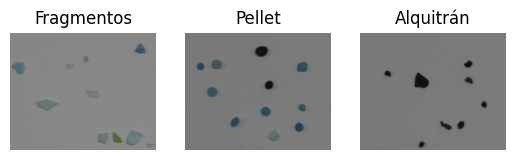

Text(0.5, 1.0, 'Contornos Alquitran')

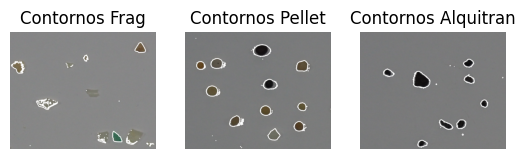

In [8]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('/content/drive/My Drive/FRA.png')
imgP = cv2.imread('/content/drive/My Drive/PEL.png')
imgT = cv2.imread('/content/drive/My Drive/TAR.png')

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF)
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP)
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT)
plt.title('Alquitrán')
plt.show()

#Generamos carácterísticas
imgF_gris = cv2.cvtColor(imgF, cv2.COLOR_BGR2GRAY)
imgP_gris = cv2.cvtColor(imgP, cv2.COLOR_BGR2GRAY)
imgT_gris = cv2.cvtColor(imgT, cv2.COLOR_BGR2GRAY)

#Umbralizamos
umbral = 112
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_thF = cv2.threshold(imgF_gris,umbral,255,cv2.THRESH_BINARY_INV)
res,img_thP = cv2.threshold(imgP_gris,umbral,255,cv2.THRESH_BINARY_INV)
res,img_thT = cv2.threshold(imgT_gris,umbral,255,cv2.THRESH_BINARY_INV)

contornosF, hierarchyF = cv2.findContours(img_thF,
    cv2.RETR_EXTERNAL ,
    cv2.CHAIN_APPROX_SIMPLE)

contornosP, hierarchyP = cv2.findContours(img_thP,
    cv2.RETR_EXTERNAL ,
    cv2.CHAIN_APPROX_SIMPLE)

contornosT, hierarchyT = cv2.findContours(img_thT,
    cv2.RETR_EXTERNAL ,
    cv2.CHAIN_APPROX_SIMPLE)

img_rgb = cv2.cvtColor(imgF, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornosF, -1, (255,255,255), 5)

plt.subplot(231)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Contornos Frag')

img_rgb = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornosP, -1, (255,255,255), 5)

plt.subplot(232)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Contornos Pellet')

img_rgb = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornosT, -1, (255,255,255), 5)

plt.subplot(233)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Contornos Alquitran')

Formas detectadas:

> Fragmentos: Formas poliedricas con aristas con tendencia recta


> Pellet: Formas circulares y elípticas



> Alquitrán: Formas poliedricas con aristas y bordes con tendencia redondeada







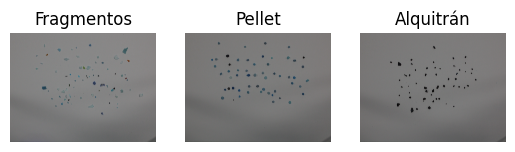

Text(0.5, 1.0, 'Contornos Alquitran')

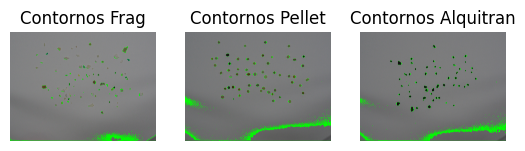

In [9]:
#Repetimos proceso con la imagen entera
img_completaP = cv2.imread('/content/drive/My Drive/pellet-03-olympus-10-01-2020.JPG')
img_completaF = cv2.imread('/content/drive/My Drive/fragment-03-olympus-10-01-2020.JPG')
img_completaT = cv2.imread('/content/drive/My Drive/tar-03-olympus-10-01-2020.JPG')

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(img_completaF)
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(img_completaP)
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(img_completaT)
plt.title('Alquitrán')
plt.show()

#Generamos carácterísticas
imgF_gris = cv2.cvtColor(img_completaF, cv2.COLOR_BGR2GRAY)
imgF_gris = cv2.convertScaleAbs(imgF_gris, alpha=2, beta=0)
imgP_gris = cv2.cvtColor(img_completaP, cv2.COLOR_BGR2GRAY)
imgP_gris = cv2.convertScaleAbs(imgP_gris, alpha=2, beta=0)
imgT_gris = cv2.cvtColor(img_completaT, cv2.COLOR_BGR2GRAY)
imgT_gris = cv2.convertScaleAbs(imgT_gris, alpha=2, beta=0)

#Umbralizamos
umbral = 200
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_thF = cv2.threshold(imgF_gris,umbral,255,cv2.THRESH_BINARY_INV)
res,img_thP = cv2.threshold(imgP_gris,umbral,255,cv2.THRESH_BINARY_INV)
res,img_thT = cv2.threshold(imgT_gris,umbral,255,cv2.THRESH_BINARY_INV)

contornosF, hierarchyF = cv2.findContours(img_thF,
    cv2.RETR_EXTERNAL ,
    cv2.CHAIN_APPROX_SIMPLE)

contornosP, hierarchyP = cv2.findContours(img_thP,
    cv2.RETR_EXTERNAL ,
    cv2.CHAIN_APPROX_SIMPLE)

contornosT, hierarchyT = cv2.findContours(img_thT,
    cv2.RETR_EXTERNAL ,
    cv2.CHAIN_APPROX_SIMPLE)

img_rgb = cv2.cvtColor(img_completaF, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornosF, -1, (0,255,0), 5)

plt.subplot(231)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Contornos Frag')

img_rgb = cv2.cvtColor(img_completaP, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornosP, -1, (0,255,0), 5)

plt.subplot(232)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Contornos Pellet')

img_rgb = cv2.cvtColor(img_completaT, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornosT, -1, (0,255,0), 5)

plt.subplot(233)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Contornos Alquitran')


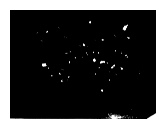

Numero de elementos fragmentados: 125


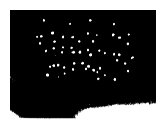

Numero de elementos pellet: 113


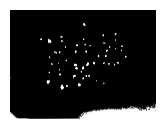

Numero de elementos alquitrán: 130


In [10]:
#Fragmentado
img_cont = np.zeros(img_completaF.shape)
countF=0
datosF=[]
for c in contornosF:
    #Área delcontorno
    area = cv2.contourArea(c)
    #Dimensión mínima (útil en ocasiones)
    if area > 50:
        countF +=1
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Datos fragmentos
        datosF.append((area, perimetro, rect, cx,cy,radio))

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont)
plt.show()
print("Numero de elementos fragmentados:", countF)

# Pellet
img_cont = np.zeros(img_completaP.shape)
countP=0
datosP=[]
for c in contornosP:
    #Área delcontorno
    area = cv2.contourArea(c)
    #Dimensión mínima (útil en ocasiones)
    if area > 50:
        countP +=1
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Datos pellet
        datosP.append((area, perimetro, rect, cx,cy,radio))
        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont)
plt.show()
print("Numero de elementos pellet:", countP)

#Alquitran
img_cont = np.zeros(img_completaT.shape)
countT=0
datosT=[]
for c in contornosT:
    #Área delcontorno
    area = cv2.contourArea(c)
    #Dimensión mínima (útil en ocasiones)
    if area > 50:
        countT +=1
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Datos alquitran
        datosT.append((area, perimetro, rect, cx,cy,radio))
        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont)
plt.show()
print("Numero de elementos alquitrán:", countT)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (TP/(n))= 0.688
Precision (TP/(TP+FP)) = 1.0
Recall (TP/(TP+FN)) = 0.688
F1 Score (2*(precision*recall)/(precision+recall)) = 0.8151658767772512
Accuracy (TP/(n))= 0.4778761061946903
Precision (TP/(TP+FP)) = 1.0
Recall (TP/(TP+FN)) = 0.4778761061946903
F1 Score (2*(precision*recall)/(precision+recall)) = 0.6467065868263473
Accuracy (TP/(n))= 0.47692307692307695
Precision (TP/(TP+FP)) = 1.0
Recall (TP/(TP+FN)) = 0.47692307692307695
F1 Score (2*(precision*recall)/(precision+recall)) = 0.6458333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(70.72222222222221, 0.5, 'Anotada')

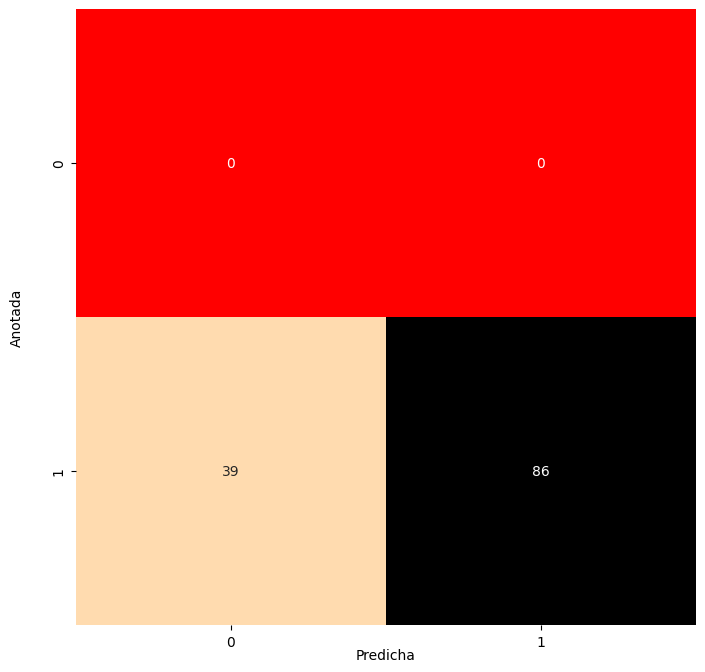

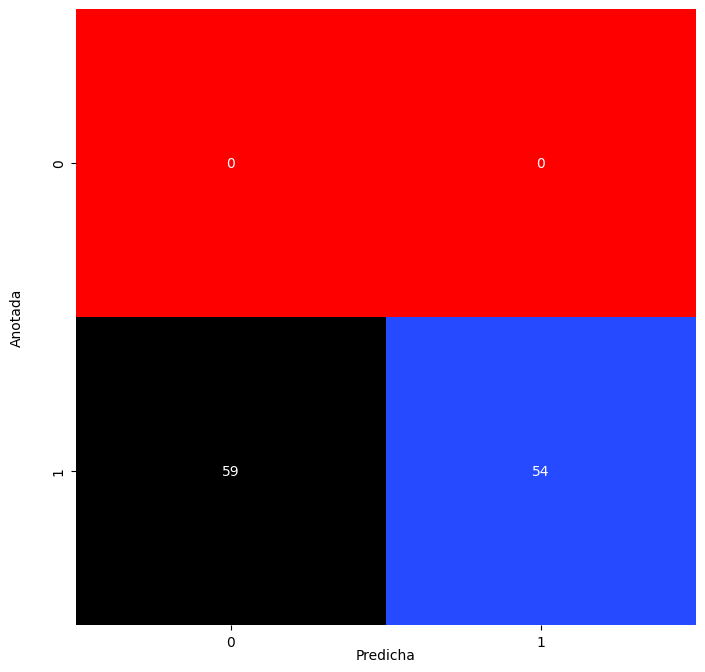

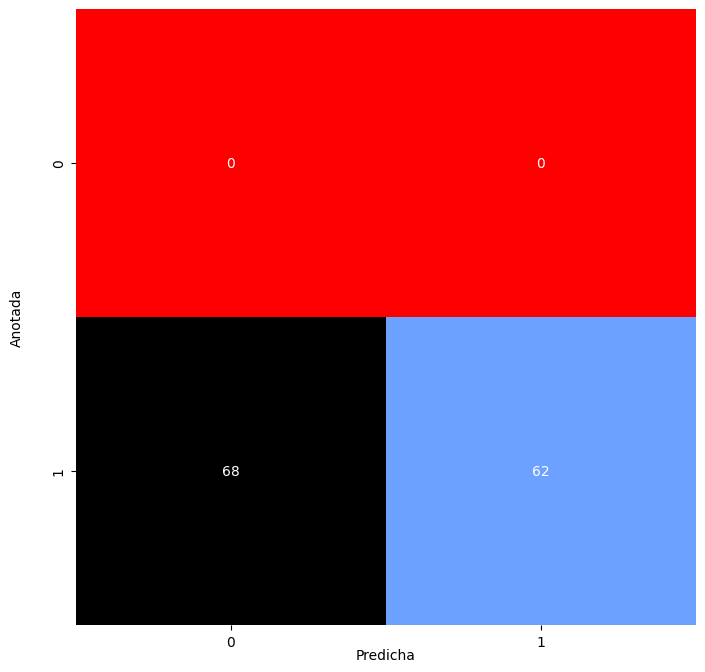

In [12]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Fragmetado
# Numero de muestras
n = 86
nclases = 2
y=[]
y_pred=[]

for _ in range(countF):
    y.append(1)

#etiquetas predichas por un supuesto clasificador
for _ in range(n):
    y_pred.append(1)
for _ in range(countF-n):
    y_pred.append(0)

accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))


ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
ax.set_xlabel("Predicha", labelpad=-0.75)
ax.set_ylabel("Anotada", labelpad=20)


# Numero de muestras
n = 54
nclases = 2
y=[]
y_pred=[]

for _ in range(countP):
    y.append(1)
#etiquetas predichas por un supuesto clasificador
for _ in range(n):
    y_pred.append(1)
for _ in range(countP-n):
    y_pred.append(0)

accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
ax.set_xlabel("Predicha", labelpad=-0.75)
ax.set_ylabel("Anotada", labelpad=20)

# Numero de muestras
n = 62
nclases = 2
y=[]
y_pred=[]

for _ in range(countT):
    y.append(1)

#etiquetas predichas por un supuesto clasificador
for _ in range(n):
    y_pred.append(1)
for _ in range(countT-n):
    y_pred.append(0)

accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))


ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión

ax.set_xlabel("Predicha", labelpad=-0.75)
ax.set_ylabel("Anotada", labelpad=20)